In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ebayauctions/eBayAuctions.csv


In [89]:
%matplotlib inline

from pathlib import Path

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [90]:
eb = pd.read_csv("../input/ebayauctions/eBayAuctions.csv")

In [91]:
ebRev = eb.copy()

In [92]:
eb.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [93]:

eb['Duration'] = eb['Duration'].astype('category')

In [94]:
eb = pd.get_dummies(eb)

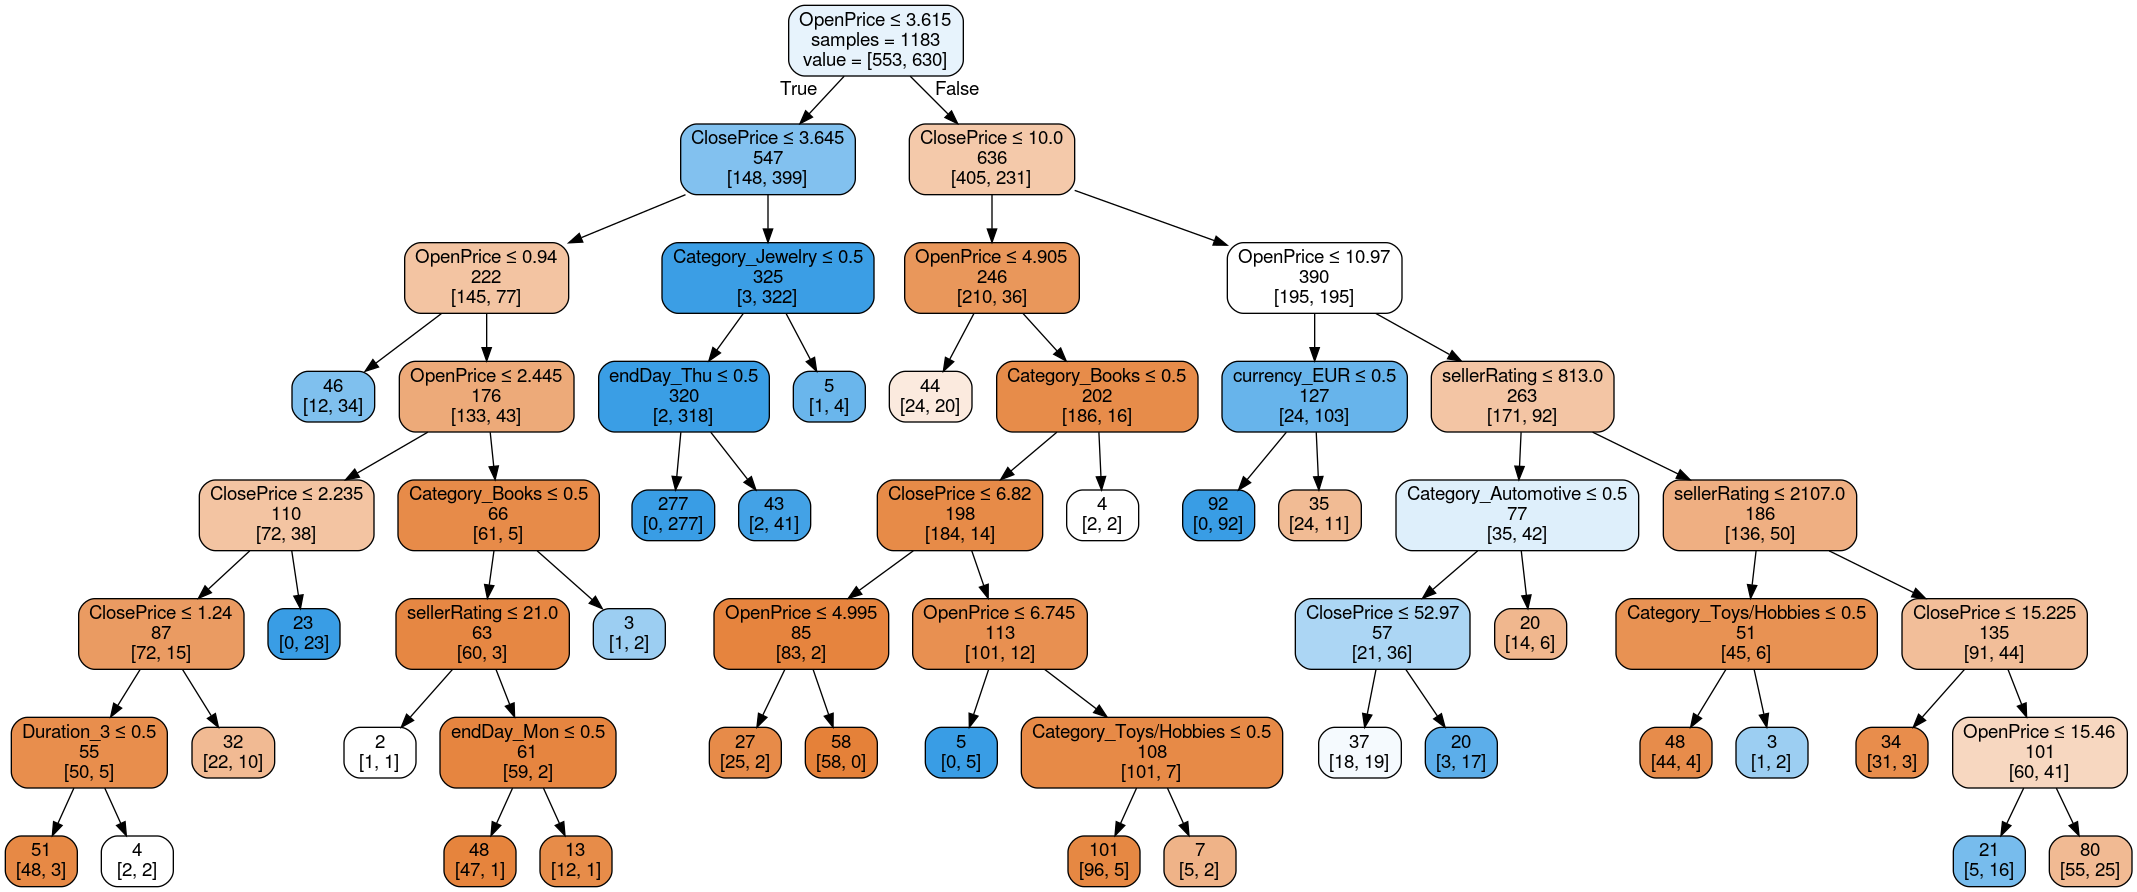

In [95]:
X = eb.drop(columns = ['Competitive?'])
y = eb['Competitive?']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

fullClassTree = DecisionTreeClassifier(min_samples_split = 50, max_depth = 7, random_state = 1)

clf = fullClassTree.fit(train_X, train_y)

plotDecisionTree(clf, feature_names = train_X.columns)

In [96]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8808)

       Prediction
Actual   0   1
     0 510  43
     1  98 532
Confusion Matrix (Accuracy 0.8428)

       Prediction
Actual   0   1
     0 320  33
     1  91 345


In [97]:
ebRev.drop(['endDay','ClosePrice', 'Duration','currency'], axis = 1,  inplace =True)

In [98]:
ebRev = pd.get_dummies(ebRev)

In [99]:
predictors = ['sellerRating', 'OpenPrice', 'Category_Antique/Art/Craft', 'Category_Automotive', 'Category_Books',
       'Category_Business/Industrial', 'Category_Clothing/Accessories',
       'Category_Coins/Stamps', 'Category_Collectibles', 'Category_Computer',
       'Category_Electronics', 'Category_EverythingElse',
       'Category_Health/Beauty', 'Category_Home/Garden', 'Category_Jewelry',
       'Category_Music/Movie/Game', 'Category_Photography',
       'Category_Pottery/Glass', 'Category_SportingGoods',
       'Category_Toys/Hobbies']
outcome = ['Competitive?']

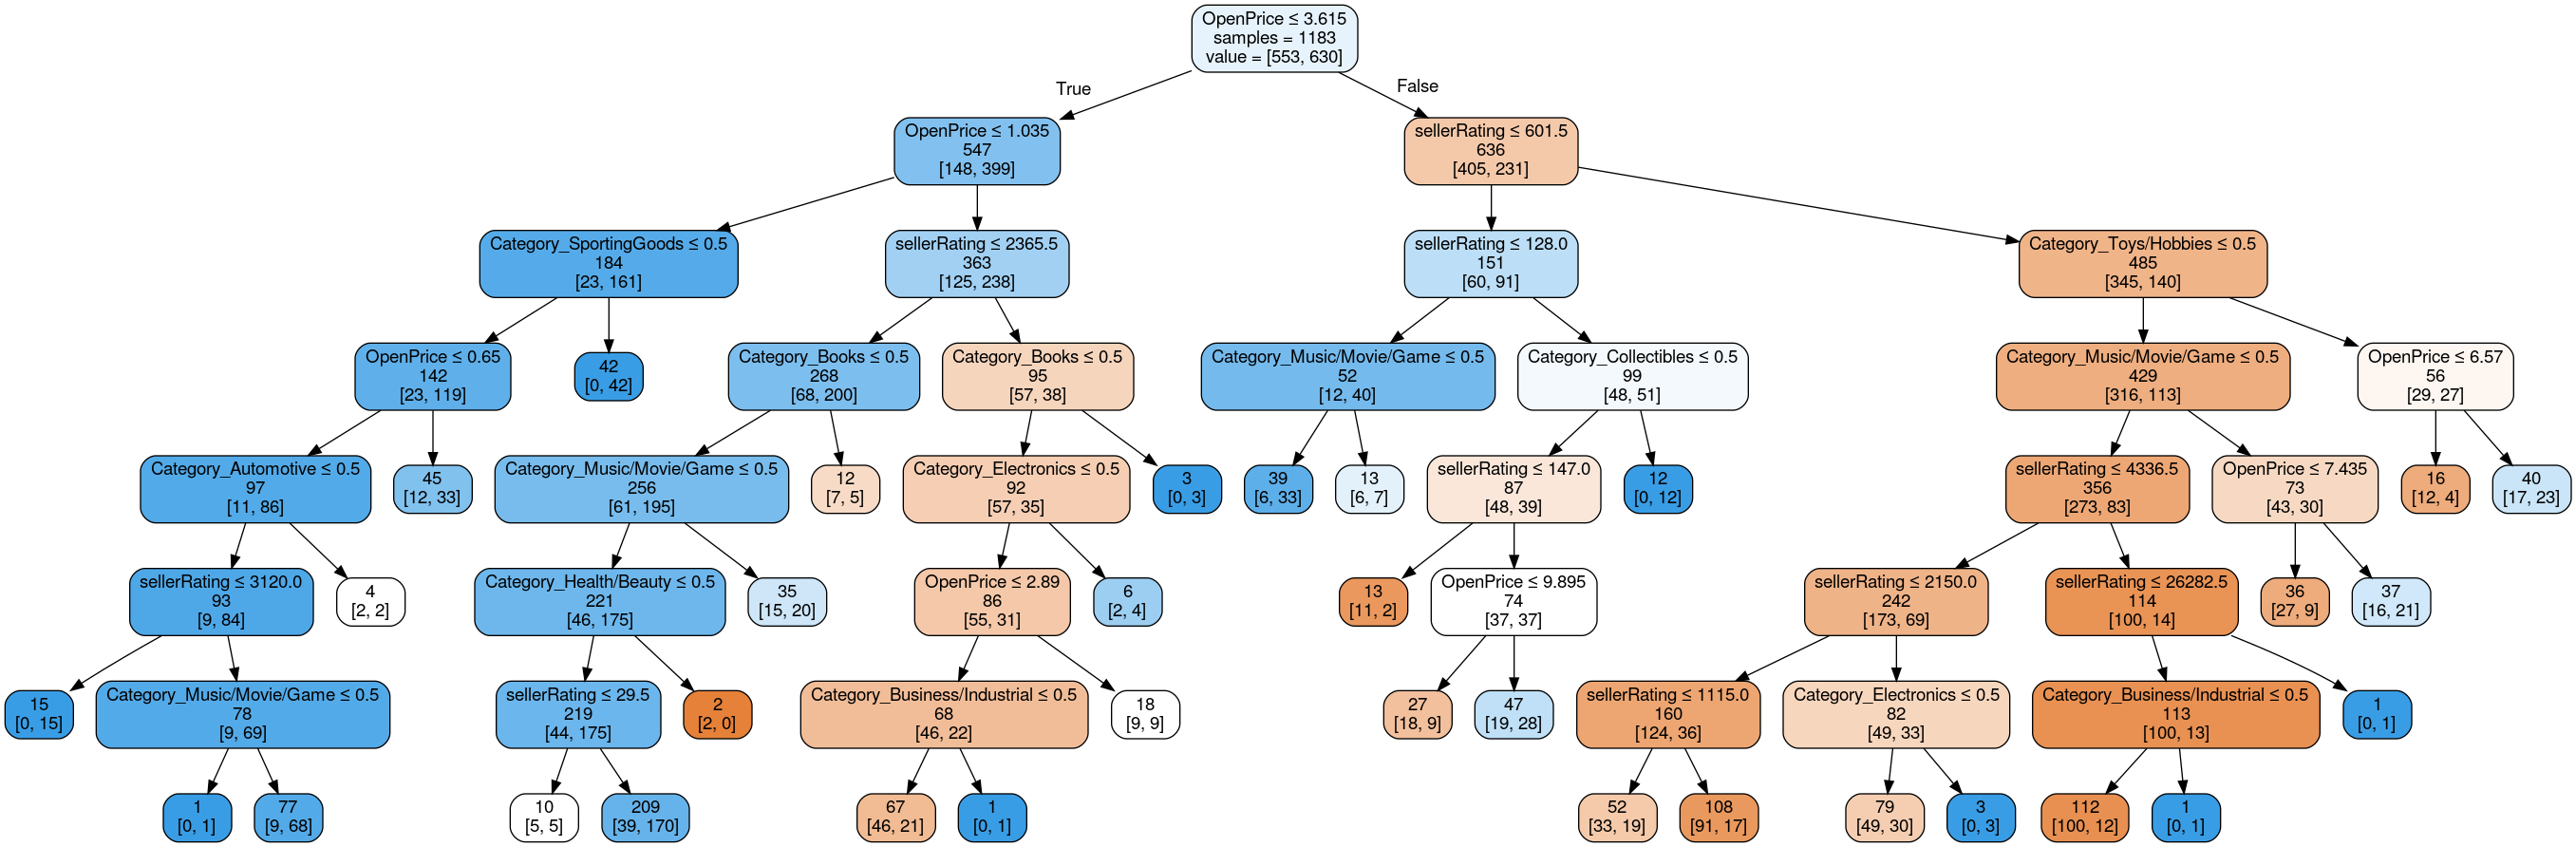

In [100]:
X = ebRev[predictors]
y = ebRev[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

smallClassTree = DecisionTreeClassifier(min_samples_split = 50, max_depth = 7, random_state = 1)

clf = smallClassTree.fit(train_X, train_y)

plotDecisionTree(clf, feature_names = train_X.columns)

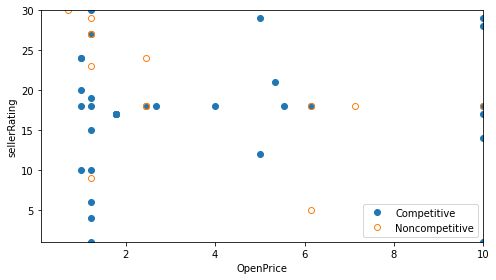

In [101]:
def basePlot(ax):
    ebRev.loc[ebRev['Competitive?'] == 1].plot(x= 'OpenPrice', y='sellerRating', style='o', markerfacecolor = 'C0', markeredgecolor = 'C0',
                                                                                         ax=ax)
    ebRev.loc[ebRev['Competitive?'] == 0].plot(x='OpenPrice', y='sellerRating', style='o', markerfacecolor = 'none', markeredgecolor = 'C1',
                                                                                         ax=ax)
    ax.legend(['Competitive', 'Noncompetitive']);
    ax.set_xlim(0.10, 10)
    ax.set_ylim(1, 30)
    ax.set_xlabel('OpenPrice')
    ax.set_ylabel('sellerRating')
    return ax

fig, ax = plt.subplots(figsize = (7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

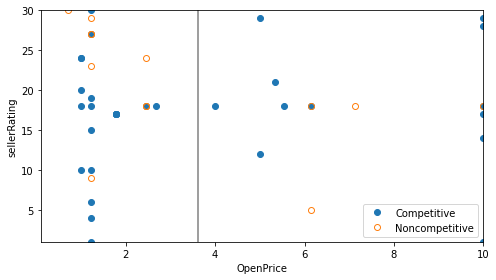

In [102]:
fig, ax = plt.subplots(figsize = (7, 4))

ax = basePlot(ax)
x0 = 3.615
ax.plot((x0, x0), (50,1), color = 'grey')
plt.tight_layout()
plt.show()

In [103]:
#Confusion matrix
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7591)

       Prediction
Actual   0   1
     0 412 141
     1 144 486
Confusion Matrix (Accuracy 0.7186)

       Prediction
Actual   0   1
     0 249 104
     1 118 318
